In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the original ready-to-use dataset
source_path = '../data/readyforEDA.csv'
df = pd.read_csv(source_path)
print(f"Loaded {source_path} with shape: {df.shape}")


Loaded ../data/readyforEDA.csv with shape: (130711, 52)


In [8]:
# Optional: align with previous preprocessing by removing rows with zero improvement_3_years
initial_shape = df.shape
df = df[df['improvement_3_years'] != 0].copy()
print(f"Filtered rows with improvement_3_years != 0: {initial_shape} -> {df.shape}")


Filtered rows with improvement_3_years != 0: (130711, 52) -> (41458, 52)


In [9]:
from xgboost import XGBClassifier
independent_variables = ['age', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'preferred_foot', 'attacker_position', 'midfielder_position',
       'defender_position']

target_variable = "big_potential"
X = df[independent_variables]
y = df[target_variable]

# Set random_state for reproducibility - ensures same results every time
clf = XGBClassifier(random_state=42)
clf.fit(X, y)

feature_importance = clf.feature_importances_

threshold = 0.020 

feature_importance_df = pd.DataFrame({'Feature': independent_variables, 'Importance': feature_importance})

selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print(selected_features)

                       Feature  Importance
0                          age    0.163618
6                     shooting    0.020488
9                    defending    0.020373
12         attacking_finishing    0.020290
13  attacking_heading_accuracy    0.022886
14     attacking_short_passing    0.020183
15           attacking_volleys    0.020473
16             skill_dribbling    0.021512
20          skill_ball_control    0.048450
32     mentality_interceptions    0.020541
33       mentality_positioning    0.021796
38   defending_standing_tackle    0.026572
39    defending_sliding_tackle    0.021450
41           attacker_position    0.021621
42         midfielder_position    0.020081


/var/folders/06/_wjmyc_97cn0n7hx93prnq000000gn/T/ipykernel_80896/2976556843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target[sorted_features].index, y=correlation_with_target[sorted_features].values, palette="coolwarm_r")  # "_r" reverses the color order


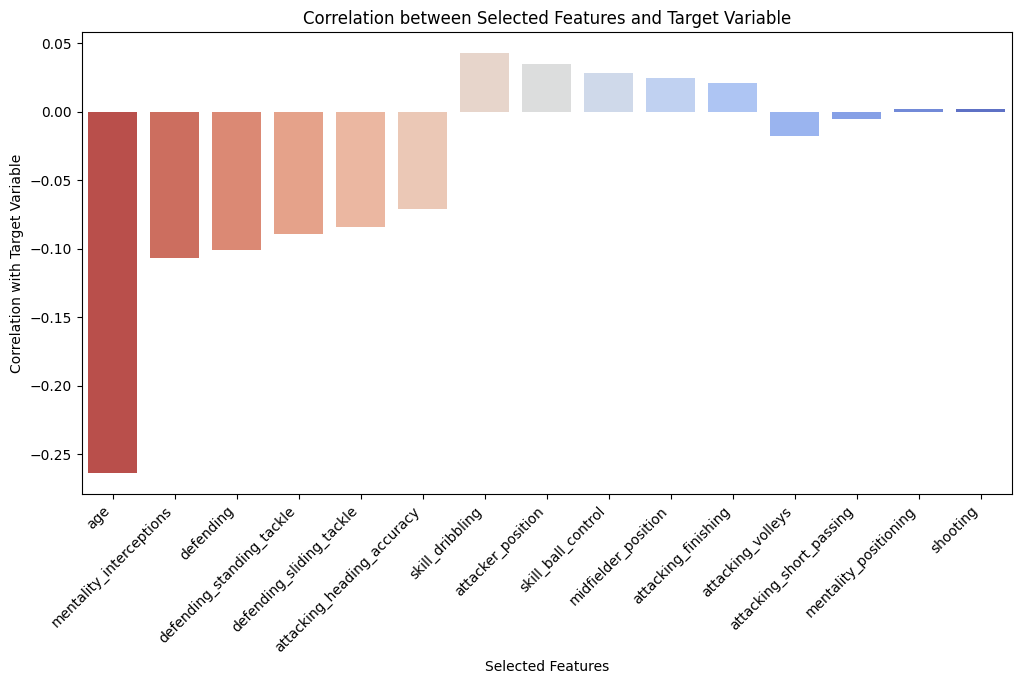

In [10]:
selected_features_with_target = df[selected_features['Feature'].values].copy()
selected_features_with_target[target_variable] = df[target_variable]

correlation_with_target = selected_features_with_target.corr()[target_variable].drop(target_variable)

sorted_features = correlation_with_target.abs().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target[sorted_features].index, y=correlation_with_target[sorted_features].values, palette="coolwarm_r")  # "_r" reverses the color order

plt.xlabel("Selected Features")
plt.ylabel("Correlation with Target Variable")
plt.title("Correlation between Selected Features and Target Variable")
plt.xticks(rotation=45, ha="right")
plt.show()


In [11]:

df_selected = df[['fifa_version'] + sorted_features.tolist() + [target_variable]].copy()
df_selected["big_potential"].value_counts()

big_potential
0    31162
1    10296
Name: count, dtype: int64

In [12]:
len(df_selected.columns)

17

In [13]:
df_selected.head()

,fifa_version,age,mentality_interceptions,defending,defending_standing_tackle,defending_sliding_tackle,attacking_heading_accuracy,skill_dribbling,attacker_position,skill_ball_control,midfielder_position,attacking_finishing,attacking_volleys,attacking_short_passing,mentality_positioning,shooting,big_potential
3,17.0,32,68,59.0,57,56,54,90,0,93,1,73,74,92,85,72.0,0
4,18.0,33,66,58.0,57,56,54,90,0,94,1,70,74,92,84,70.0,0
5,19.0,34,66,61.0,57,56,54,90,0,94,1,70,74,92,84,70.0,0
9,17.0,35,68,63.0,66,65,43,75,0,77,1,68,69,83,67,73.0,0
19,17.0,31,81,79.0,80,76,74,44,0,60,0,20,19,62,29,35.0,0


In [14]:
df_selected["fifa_version"].value_counts()

fifa_version
17.0    8889
18.0    8814
19.0    8777
20.0    8091
21.0    6887
Name: count, dtype: int64

In [15]:
file_path = '../data/feature_engineered_data_v2.csv'
df_selected.to_csv(file_path, index=False)

print(f'DataFrame df_selected has been saved as {file_path}')

DataFrame df_selected has been saved as ../data/feature_engineered_data_v2.csv
